In [27]:
import requests
import tarfile
import os


# URL of the dataset
url = "http://pascal.inrialpes.fr/data2/douze/jsgd_data/groupFungus_k64_nclass10_nex10.tgz"

# Directory to save the downloaded and extracted files
save_dir = "data"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# File path to save the downloaded archive
download_path = os.path.join(save_dir, "groupFungus_k64_nclass10_nex10.tgz")

# Download the dataset
response = requests.get(url)
with open(download_path, "wb") as f:
    f.write(response.content)

# Extract the contents of the downloaded archive
with tarfile.open(download_path, "r:gz") as tar:
    tar.extractall(save_dir)

print("Dataset downloaded and extracted successfully.")


Dataset downloaded and extracted successfully.


In [28]:
import requests
import tarfile
import os


# URL of the dataset
url = "http://lear.inrialpes.fr/src/jsgd/fvecs_read.m"

# Directory to save the downloaded and extracted files
save_dir = "data1"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# File path to save the downloaded archive
download_path = os.path.join(save_dir, "readmed file")

# Download the dataset
response = requests.get(url)
with open(download_path, "wb") as f:
    f.write(response.content)

# # Extract the contents of the downloaded archive
# with tarfile.open(download_path, "r:gz") as tar:
#     tar.extractall(save_dir)

print("Dataset downloaded and extracted successfully.")


Dataset downloaded and extracted successfully.


In [29]:
import numpy as np

def load_fvecs_file(file_path):
    data = []
    with open(file_path, 'rb') as f:
        # Read the entire file
        content = f.read()
        # Each feature vector is typically a float32 or float64 array
        dtype = np.float32
        # Determine the dimensionality of each feature vector
        dim = np.frombuffer(content[:4], dtype=np.int32)[0]
        # Parse the file contents to extract the feature vectors
        num_vectors = len(content) // (dim * 4 + 4)
        for i in range(num_vectors):
            vec_start = i * (dim * 4 + 4) + 4
            vec_end = vec_start + dim * 4
            vector = np.frombuffer(content[vec_start:vec_end], dtype=dtype)
            data.append(vector)
    return np.array(data)


In [30]:
# print("values of first file")
# file_path_1 = 'C:\\Users\\ayush\\OneDrive\\Desktop\\convexProject\\data\\example_data\\groupFungus_k64_nclass10_nex10_Ltest.ivecs'
# data_1 = load_fvecs_file(file_path_1)
# print(data_1.shape)
# print(data_1[:1].shape)
# print(data_1[:1])

# print("values of second file")
# file_path_2 = 'C:\\Users\\ayush\\OneDrive\\Desktop\\convexProject\\data\\example_data\\groupFungus_k64_nclass10_nex10_Ltrain.ivecs'
# data_2 = load_fvecs_file(file_path_2)
# print(data_2.shape)
# print(data_2[:1].shape)
# print(data_2[:1])

print("values of third file")
file_path_3 = 'C:\\Users\\ayush\\OneDrive\\Desktop\\convexProject\\data\\example_data\\groupFungus_k64_nclass10_nex10_Xtest.fvecs'

# # file_path_3 = 'C:\Users\ayush\OneDrive\Desktop\convexProject\data\example_data\groupFungus_k64_nclass10_nex10_Xtest.fvecs'
data_3 = load_fvecs_file(file_path_3)
print(data_3.shape)
print(data_3[:1].shape)
print(data_3[:1])

# print("values of fourth file")
# file_path_4 = 'C:\\Users\\ayush\\OneDrive\\Desktop\\convexProject\\data\\example_data\\groupFungus_k64_nclass10_nex10_Xtrain.fvecs'
# data_4 = load_fvecs_file(file_path_4)
# print(data_4.shape)
# print(data_4[:1].shape)
# print(data_4[:1])

values of third file
(100, 4096)
(1, 4096)
[[ 0.02582778 -0.02279111 -0.01407144 ... -0.01093724  0.01594544
   0.00646785]]


In [31]:
from scipy.linalg import eigh as largest_eigh
from scipy.sparse.linalg import svds
import numpy as np
import time

max_itr = 50
c = 10
lam = 0.01
                                                  
def logistic_gradient(W, xi, yi):
  score = np.exp(np.dot(xi, W))
  sum_score = np.sum(score)
  dW = (xi[:, np.newaxis] * score) / sum_score
  dW[:, yi] -= xi
  return dW

def logistic_loss_gradient(W,x,y):
  nu_points = x.shape[0]
  m,n = W.shape
  grad = np.zeros((m,n))
  for i in range(nu_points):
    grad =+ grad + logistic_gradient(W,x[i],y[i])
  return grad/nu_points

def regulizer_subgradient(W):
  U, D, Vt  = np.linalg.svd(W, full_matrices=False)
  rank = np.linalg.matrix_rank(W)
  U1 = U[:,:rank]
  V1t = Vt[:rank,:]
  nuclear_norm = np.sum(D)
  return 2*lam*nuclear_norm*(U1@V1t)



def logistic_loss(W,x,y):
  nu_points = x.shape[0]
  f = 0
  for i in range(nu_points):
    score = np.exp(np.dot(x[i], W))
    sum_score = np.sum(score)
    f = f + (-np.log(score[y[i]]/sum_score))

  return f/nu_points

def loss_fun(W,x,y):
  _, S, _ = np.linalg.svd(W)
  trace_norm = np.sum(S)
  g = lam*trace_norm*trace_norm

  return logistic_loss(W,x,y) +g



def conjugate_min(W):
    left_singular_vector, singular_value, right_singular_vector = svds(W, k=1)
    return (1 / (2 * lam)) *singular_value* np.outer(left_singular_vector, right_singular_vector)


In [32]:
## proximal function

from scipy.optimize import bisect

def finding_root_u(x):
    def fun(root_u):
        return np.sum(np.maximum((((np.sqrt(lam) * x) / root_u) - 2 * lam), 0)) - 1

    m = max(x)/2*lam

    root = bisect(fun, 0, 1 )
    return root

def proximal_fun(W, a):
  if np.all(W == 0):
    return W
  else:
    U, D, Vt  = np.linalg.svd(W, full_matrices=False)
    p = a * lam  

    prox_vec = []
    for i in range(len(D)):
      root_u = finding_root_u(D)
      l = np.maximum((((np.sqrt(p)*D[i])/ root_u) - 2*p),0)
      prox = (l*D[i])/(l+2*p)
      prox_vec.append(prox)
    prox_vec = np.array(prox_vec)
    prox_dig = np.diag(prox_vec)
    
    return U[:,:10] @ prox_dig@ Vt

In [33]:
def run_subgradient_descent(xi,yi, initial = None):
    n = xi.shape[1]
    X = initial
    if X is None:
        X = np.zeros((n,c))
    #Minimum Value of the function
    min_X = X
    min_value = np.inf

    #Treshold
    treshold = False

    #printing variables
    global_count = 1
    opt_itr = global_count

    #Graphing variables
    x_variables = [X]
    function_values = [loss_fun(X,xi,yi)]
    function_values_act = [loss_fun(X,xi,yi)]
    itr_time = [0]
    X_rank =[0]

    #Becomes true when the iterations are exceeded
    while(not treshold):
        start_time_itr = time.time()


        if global_count % 20 ==0:
            print(f"....in {global_count}th iteration") 

        #Calculates the necesarry advancing parameters
        X_actual = X

        g = logistic_loss_gradient(X_actual,xi,yi) + regulizer_subgradient(X)
        p = (-1)*g/np.linalg.norm(g.T)
        a = 1/np.sqrt(max_itr)
        X = X_actual + a*p

        
        #Calcultaes the value
        temp_value = loss_fun(X,xi,yi)

        #Refreshes the global minimum
        if(temp_value < min_value):
            min_X = X
            min_value = temp_value
            opt_itr = global_count

        
        
        rank = np.linalg.matrix_rank(X)
        time_itr = time.time()-start_time_itr

        #Saves the current minimum value
        x_variables.append(min_X)
        function_values.append(min_value)
        function_values_act.append(temp_value)
        X_rank.append(rank)
        itr_time.append(time_itr)

        global_count = global_count +1
        treshold = global_count >= max_itr


    return [min_X, min_value, x_variables, function_values, function_values_act, X_rank, itr_time,  opt_itr]



In [34]:
def run_gengradient_descent(xi,yi, initial = None):
    n = xi.shape[1]
    X = initial
    if X is None:
        X = np.zeros((n,c))
    
    min_X = X
    min_value = np.inf
    
    treshold = False
    global_count = 1
    opt_itr = global_count
    
    x_variables = [X]
    function_values = [loss_fun(X,xi,yi)]
    function_values_act = [loss_fun(X,xi,yi)]
    itr_time = [0]
    X_rank =[0]

    while(not treshold):
        start_time_itr = time.time()

        if global_count % 20 ==0:
            print(f"....in {global_count}th iteration") 
            
        X_actual = X
        g = logistic_loss_gradient(X_actual,xi,yi)
        Y = conjugate_min(-g)

        a = 2/(global_count+1)
        # X = a*X_actual + (1-a)*Y
        X = (1-a)*X_actual + a*Y

        
    
        temp_value = loss_fun(X,xi,yi)
        if(temp_value < min_value):
            min_X = X
            min_value = temp_value
            opt_itr = global_count

        global_count = global_count +1
        
        treshold = global_count >= max_itr

        ##compute the rank and time taken per iteration
        rank = np.linalg.matrix_rank(X)
        time_itr = time.time()-start_time_itr

        #Saves the current minimum value
        x_variables.append(min_X)
        function_values.append(min_value)
        function_values_act.append(temp_value)
        X_rank.append(rank)
        itr_time.append(time_itr)

    return [min_X, min_value, x_variables, function_values,function_values_act, X_rank, itr_time,  opt_itr]


In [35]:
def run_proximal(xi,yi, initial = None ):

    n = xi.shape[1]

    X = initial
    if X is None:
        X = np.zeros((n,c))

    min_X = X
    min_value = np.inf

    #Treshold
    treshold = False


    global_count = 1
    #The number of values than are smaller than eps
    opt_itr = global_count

    #Graphing variables
    x_variables = [X]
    function_values = [loss_fun(X,xi,yi)]
    function_values_act = [loss_fun(X,xi,yi)]
    itr_time = [0]
    X_rank =[0]

    alpha = 0.5
    beta = 0.5
    #Becomes true when the iterations are exceeded or when |G| < eps
    while(not treshold):
        start_time_itr = time.time()
        # print(f"....in {global_count}th iteration")
        
        if global_count % 20 ==0:
            print(f"....in {global_count}th iteration") 

        
        
        X_actual = X
        g = logistic_loss_gradient(X_actual,xi,yi)
      
        a = 1

        prox=  proximal_fun(X_actual - a*g,a)   ## made some changes keep in mind
        G = (-1)*(X_actual - prox/a)
        
        X = X_actual + a*G
        X_last = X_actual

        

        temp_value = loss_fun(X,xi,yi)
        if(temp_value < min_value):
            min_X = X
            min_value = temp_value
            opt_itr = global_count

        global_count = global_count + 1

        treshold = global_count >= max_itr

       ##compute the rank and time taken per iteration
        rank = np.linalg.matrix_rank(X)
        time_itr = time.time()-start_time_itr

        #Saves the current x
        x_variables.append(X)
        function_values.append(min_value)
        function_values_act.append(temp_value)
        X_rank.append(rank)
        itr_time.append(time_itr)

    return [min_X, min_value, x_variables, function_values,function_values_act, X_rank, itr_time,  opt_itr]

In [36]:
## accelaraterd projected gradient descent

def run_fista(xi,yi, initial = None):
    n = xi.shape[1]

    X = initial
    if X is None:
        X = np.zeros((n,c))

    min_X = X
    min_value = np.inf
    X_K1 = X
    X_K2 = X
    #Treshold
    treshold = False


    global_count = 2
    opt_itr = global_count

    #Graphing variables
    x_variables = [X,X]
    function_values = [loss_fun(X,xi,yi),loss_fun(X,xi,yi)]
    function_values_act = [loss_fun(X,xi,yi),loss_fun(X,xi,yi)]
    itr_time = [0,0]
    X_rank =[0,0]
    alpha = 0.5
    beta =0.5
    
    while(not treshold):
        start_time_itr = time.time()
        
        if global_count % 20 ==0:
            print(f"....in {global_count}th iteration")

        Y = X_K1 + ((global_count-2)/(global_count+1))*(X_K1 - X_K2)
        g = logistic_loss_gradient(Y,xi,yi)
        a = 1
        prox = proximal_fun(Y - a*g,a)
        G = (-1)*(Y - prox)/a
        X = Y + a*G
        
        X_K2 = X_K1
        X_K1 = X

        

        temp_value = loss_fun(X,xi,yi)
        if(temp_value < min_value):
            min_X = X
            min_value = temp_value
            opt_itr = global_count

        global_count = global_count + 1

        treshold = global_count >= max_itr

       ##compute the rank and time taken per iteration
        rank = np.linalg.matrix_rank(X)
        time_itr = time.time()-start_time_itr

        #Saves the current x
        x_variables.append(X)
        function_values.append(min_value)
        function_values_act.append(temp_value)
        X_rank.append(rank)
        itr_time.append(time_itr)

    return [min_X, min_value, x_variables, function_values,function_values_act, X_rank, itr_time,  opt_itr]

In [37]:
x = data_3
y = np.random.randint(0, 10, size=100)


In [38]:

## running the subgradeint descent algorithim

X_s, L_s, x_values_s, f_values_s, f_act_values_s, ranks_s, times_s, count_s = run_subgradient_descent(x,y)
print("for the subgradient descent")
# print("minimum X value is", X_s)
print("minimum function value is", L_s)
print("list of function values are", f_act_values_s)
print("rank of the matrix are", ranks_s)
print("time taken per iteration is", times_s)
print("optimal iteration is", count_s)
print()

....in 20th iteration
....in 40th iteration
for the subgradient descent
minimum function value is 2.2620633133746773
list of function values are [2.3025850929940423, 2.2909038782290203, 2.2825171572648784, 2.2770646651900206, 2.2735405290711483, 2.270373372634061, 2.270268493686317, 2.2683157364641144, 2.2678816144146707, 2.269638751051266, 2.266441358371932, 2.2661761162321827, 2.265325695727141, 2.266059143274154, 2.2646527095424718, 2.2665955547033905, 2.2634394441525965, 2.2672684494921653, 2.26405654475133, 2.265018645354604, 2.263370560265373, 2.2643805685064793, 2.263219869465844, 2.265697132748616, 2.264450075619325, 2.2643074177873377, 2.2638643034794375, 2.2643793015443943, 2.263784537169425, 2.264113105437717, 2.263502771629835, 2.263512093073761, 2.2629925322950784, 2.2643030591427302, 2.262902903547914, 2.264061162790247, 2.2620633133746773, 2.264181357185544, 2.2623123610713924, 2.2630261994625895, 2.2630283485402267, 2.2624242404346537, 2.263516905250834, 2.2625078065466

In [39]:
### running the genralized gradient descent algorithim
X_g, L_g, x_values_g, f_values_g,f_act_values_g, ranks_g, times_g, count_g = run_gengradient_descent(x,y)
print("for the genralized gradient descent")
# print("minimum X value is", X_g)
print("minimum function value is", L_g)
print("list of function values are", f_act_values_g)
print("rank of the matrix are", ranks_g)
print("time taken per iteration is", times_g)
print("optimal iteration is", count_g)
print()



....in 20th iteration
....in 40th iteration
for the genralized gradient descent
minimum function value is 2.255052013898489
list of function values are [2.3025850929940423, 2.2646643057287172, 2.2624697242835814, 2.257801918275459, 2.256447641517837, 2.2558787393650395, 2.2555945445466383, 2.2554340462343445, 2.2553349841666113, 2.2552696446197467, 2.2552242898563515, 2.2551915131347413, 2.255167044367691, 2.2551482839939574, 2.2551335765625877, 2.2551218272810445, 2.255112288536905, 2.255104435541672, 2.2550978910117485, 2.255092377979198, 2.255087689336587, 2.2550836676603603, 2.255080191529087, 2.2550771660507944, 2.2550745161806445, 2.255072181926561, 2.2550701148562275, 2.255068275516295, 2.255066631500994, 2.255065155989608, 2.255063826626899, 2.2550626246574326, 2.255061534249946, 2.2550605419654652, 2.25505963633519, 2.2550588075229623, 2.255058047053454, 2.255057347591816, 2.2550567027639565, 2.255056107009049, 2.2550555554578673, 2.2550550438318626, 2.255054568359048, 2.25505

In [40]:
### running for the proximal gradient descent algorithim
X_p, L_p, x_values_p, f_values_p, f_act_values_p, ranks_p, times_p, count_p = run_proximal(x,y)
print("for the proximal gradient descent")
# print("minimum X value is", X_p)
print("minimum function value is", L_p)
print("list of function values are", f_act_values_p)
print("rank of the matrix are", ranks_p)
print("time taken per iteration is", times_p)
print("optimal iteration is", count_p)
print()


C:\Users\ayush\AppData\Local\Temp\ipykernel_6460\1117978302.py:7: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.maximum((((np.sqrt(lam) * x) / root_u) - 2 * lam), 0)) - 1


....in 20th iteration
....in 40th iteration
for the proximal gradient descent
minimum function value is 2.262140522875345
list of function values are [2.3025850929940423, 2.2954451796462796, 2.2901834830773757, 2.2862659618903383, 2.2833108132836935, 2.2810450705738408, 2.2792735738217473, 2.277856786691041, 2.2766949377759262, 2.2757166833932945, 2.2748710027779055, 2.2741214040942803, 2.27344178241385, 2.2728134586463176, 2.2722230627066056, 2.2716610202042795, 2.2711204705766463, 2.2705964936514356, 2.2701308289315816, 2.2696947912771757, 2.269272806605275, 2.2688620991904864, 2.2684606050922027, 2.268066786973391, 2.2676794971434444, 2.2673198747992016, 2.2669905057589665, 2.266668675140293, 2.2663532375934534, 2.266043308925731, 2.2657382050190837, 2.2654614852061754, 2.2652059341775312, 2.2649564236503394, 2.2647121141172115, 2.2644822709386996, 2.2642866798580887, 2.2640979866143143, 2.263915216353781, 2.263737565328772, 2.2635643703774866, 2.263395083856217, 2.263229253049235, 

In [41]:
## running for the fista
X_f, L_f, x_values_f, f_values_f, f_act_values_f, ranks_f, times_f, count_f= run_fista(x,y)
print("for the proximal gradient descent")
# print("minimum X value is", X_f)
print("minimum function value is", L_f)
print("list of function values are", f_act_values_f)
print("rank of the matrix are", ranks_f)
print("time taken per iteration is", times_f)
print("optimal iteration is", count_f)
print()

C:\Users\ayush\AppData\Local\Temp\ipykernel_6460\1117978302.py:7: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.maximum((((np.sqrt(lam) * x) / root_u) - 2 * lam), 0)) - 1


....in 20th iteration
....in 40th iteration
for the proximal gradient descent
minimum function value is 2.25504628385869
list of function values are [2.3025850929940423, 2.3025850929940423, 2.2954451796462796, 2.28899133951281, 2.283698470289987, 2.279673411786596, 2.2767499302634393, 2.274619168431834, 2.272949640523265, 2.2714684524331967, 2.269996106984688, 2.26864124388103, 2.2673123196926492, 2.2660551760683667, 2.2648809675699364, 2.2638989235813773, 2.2631383421843467, 2.262397534871107, 2.261653630901049, 2.26089505995374, 2.2602559069095745, 2.259707649646942, 2.259159846117681, 2.2586084565370874, 2.258254354162424, 2.2579273861620237, 2.2576082745355763, 2.2572909139711643, 2.2569727479081205, 2.256654365898287, 2.2564746627799237, 2.256359769729135, 2.2562557719794483, 2.2561570318442428, 2.2560595046188334, 2.2559609119736708, 2.2558606275284334, 2.2557593568075727, 2.2556587029766866, 2.2555607049792767, 2.2554674196345332, 2.2553805983423256, 2.255301486827893, 2.2552307

In [42]:
def find_sin_value(A):
    U, S, Vt = np.linalg.svd(A)
    return S

singular_s = find_sin_value(X_s)
print(f"singular values for subgradient descent is {singular_s}")
print(f"rank {np.linalg.matrix_rank(X_s)}")

singular_g = find_sin_value(X_g)
print(f"singular values for gcg is {singular_g}")
print(f"rank {np.linalg.matrix_rank(X_g)}")



singular_p = find_sin_value(X_p)
print(f"singular values for proximal is {singular_p}")
print(f"rank {np.linalg.matrix_rank(X_p)}")


singular_f = find_sin_value(X_f)
print(f"singular values for fista is {singular_f}")
print(f"rank {np.linalg.matrix_rank(X_f)}")



singular values for subgradient descent is [1.20978175 0.34474275 0.06090098 0.05257005 0.0331434  0.02920696
 0.02568871 0.02430407 0.01803299 0.01181359]
rank 10
singular values for gcg is [1.93562059e+00 2.55484105e-03 3.89712314e-05 9.09057292e-07
 6.85488953e-07 1.77574640e-08 2.02331357e-10 3.99224309e-12
 1.97393510e-14 1.36587161e-16]
rank 8
singular values for proximal is [9.01186077e-01 3.95358301e-01 2.27561338e-01 1.21615903e-01
 3.79899285e-02 1.25134438e-16 6.43465067e-17 4.81364610e-17
 3.21833235e-17 2.52349358e-17]
rank 5
singular values for fista is [1.93755383e+00 2.66778210e-16 4.25334973e-17 2.62622075e-17
 2.15076612e-17 2.00920868e-17 1.83955934e-17 1.52672601e-17
 1.41034361e-17 3.41390006e-18]
rank 1


In [43]:
## for subgradient descnet
cumulative_time_list_s = []
cumulative_time_s = 0
for num in times_s:
    cumulative_time_s += num
    cumulative_time_list_s.append(cumulative_time_s)

## for genralized gradient descnet
cumulative_time_list_g = []
cumulative_time_g = 0
for num in times_g:
    cumulative_time_g += num
    cumulative_time_list_g.append(cumulative_time_g)

## for proximal gradient descent
cumulative_time_list_p = []
cumulative_time_p = 0
for num in times_p:
    cumulative_time_p += num
    cumulative_time_list_p.append(cumulative_time_p)


## for fista
cumulative_time_list_f = []
cumulative_time_f = 0
for num in times_f:
    cumulative_time_f += num
    cumulative_time_list_f.append(cumulative_time_f)


50


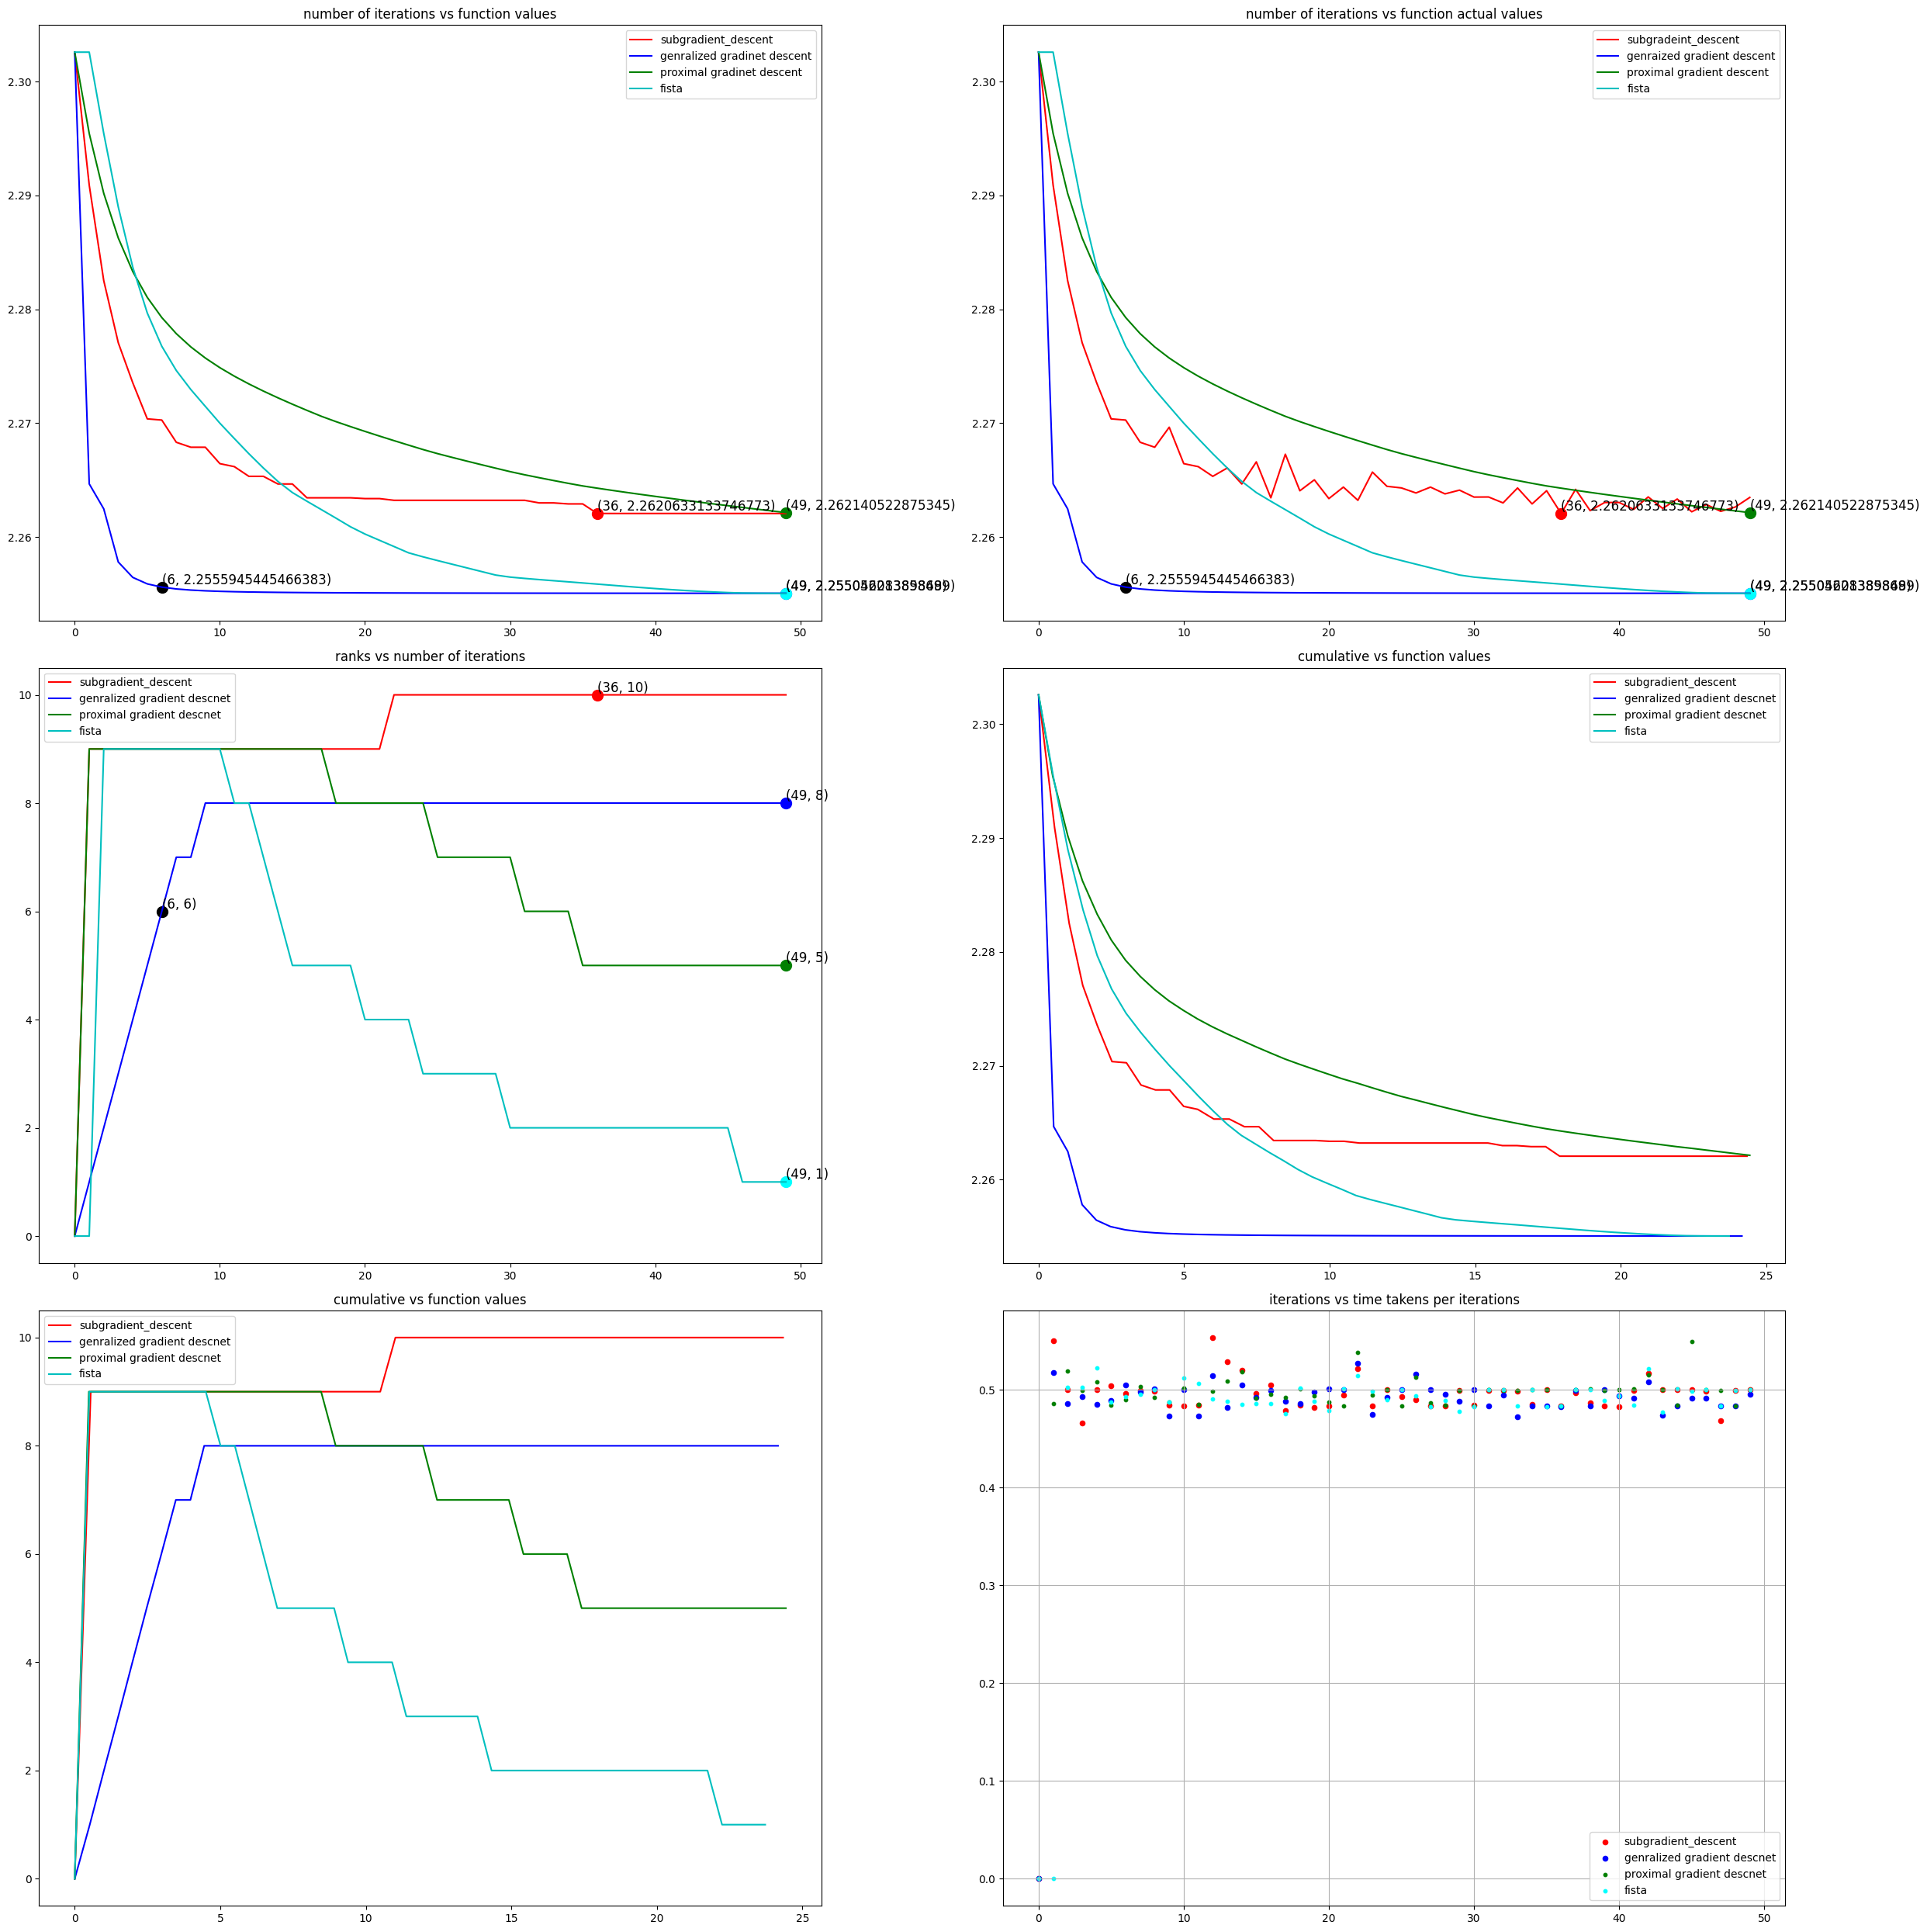

In [44]:
import matplotlib.pyplot as plt
print(len(f_values_s))
x_values = range(0,len(f_values_g))

fig, axs = plt.subplots(3, 2, figsize=(25,25))

# highlight point
other_opt = 6

axs[0, 0].plot(x_values, f_values_s, 'r-', label='subgradient_descent')
axs[0, 0].plot(x_values, f_values_g, 'b-', label='genralized gradinet descent')
axs[0, 0].plot(x_values, f_values_p, 'g-', label='proximal gradinet descent')
axs[0, 0].plot(x_values, f_values_f, 'c-', label='fista')  
highlight_points = [(count_s, f_values_s[count_s], 'red', 100), 
                    (count_g, f_values_g[count_g], 'blue', 100), 
                    (count_p, f_values_p[count_p], 'green', 100), 
                    (count_f, f_values_f[count_f], 'cyan', 100),
                    (other_opt, f_values_g[other_opt], 'black',100)]
for x, y,color,size in highlight_points:
    axs[0, 0].scatter(x, y, color=color, marker='o', s= size)
    axs[0, 0].text(x, y, f'({x}, {y})', fontsize=12, ha='left', va='bottom')
axs[0, 0].set_title('number of iterations vs function values')  # Set title for the first subplot
axs[0, 0].legend()  # Add legend to the first subplot


axs[0, 1].plot(x_values, f_act_values_s, 'r-', label='subgradeint_descent')  # Plot first curve in the second subplot
axs[0, 1].plot(x_values, f_act_values_g, 'b-', label='genraized gradient descent')
axs[0, 1].plot(x_values, f_act_values_p, 'g-', label='proximal gradient descent')
highlight_points = [(count_s, f_act_values_s[count_s], 'red', 100), 
                    (count_g, f_act_values_g[count_g], 'blue', 100), 
                    (count_p, f_act_values_p[count_p], 'green', 100), 
                    (count_f, f_act_values_f[count_f], 'cyan', 100),
                    (other_opt, f_values_g[other_opt], 'black',100)]
for x, y,color,size in highlight_points:
    axs[0, 1].scatter(x, y, color=color, marker='o', s= size)
    axs[0, 1].text(x, y, f'({x}, {y})', fontsize=12, ha='left', va='bottom')
axs[0, 1].plot(x_values, f_act_values_f, 'c-', label='fista')  # Plot second curve in the second subplot
axs[0, 1].set_title('number of iterations vs function actual values')  # Set title for the second subplot
axs[0, 1].legend()  # Add legend to the second subplot

axs[1, 0].plot(x_values, ranks_s, 'r-', label='subgradient_descent')  # Plot first curve in the third subplot
axs[1, 0].plot(x_values, ranks_g, 'b-', label='genralized gradient descnet')
axs[1, 0].plot(x_values, ranks_p, 'g-', label='proximal gradient descnet')
axs[1, 0].plot(x_values, ranks_f, 'c-', label='fista')  
highlight_points = [(count_s, ranks_s[count_s], 'red', 100), 
                    (count_g, ranks_g[count_g], 'blue', 100), 
                    (count_p, ranks_p[count_p], 'green', 100), 
                    (count_f, ranks_f[count_f], 'cyan', 100),
                    (other_opt, ranks_g[other_opt], 'black',100)]
for x, y,color,size in highlight_points:
    axs[1, 0].scatter(x, y, color=color, marker='o', s= size)
    axs[1, 0].text(x, y, f'({x}, {y})', fontsize=12, ha='left', va='bottom')
axs[1, 0].set_title('ranks vs number of iterations')  # Set title for the third subplot
axs[1, 0].legend()  # Add legend to the third subplot

axs[1,1].plot(cumulative_time_list_s, f_values_s, 'r-', label='subgradient_descent')  # Plot first curve in the third subplot
axs[1,1].plot(cumulative_time_list_g, f_values_g, 'b-', label='genralized gradient descnet')
axs[1,1].plot(cumulative_time_list_p, f_values_p, 'g-', label='proximal gradient descnet')
axs[1,1].plot(cumulative_time_list_f, f_values_f, 'c-', label='fista')  
axs[1,1].set_title('cumulative vs function values') 
axs[1,1].legend()  

axs[2,0].plot(cumulative_time_list_s, ranks_s, 'r-', label='subgradient_descent')  # Plot first curve in the third subplot
axs[2,0].plot(cumulative_time_list_g, ranks_g, 'b-', label='genralized gradient descnet')
axs[2,0].plot(cumulative_time_list_p, ranks_p, 'g-', label='proximal gradient descnet')
axs[2,0].plot(cumulative_time_list_f, ranks_f, 'c-', label='fista')  # Plot second curve in the third subplot
axs[2,0].set_title('cumulative vs function values')  # Set title for the third subplot
axs[2,0].legend()  # Add legend to the third subplot

axs[2,1].scatter(x_values, times_s, color= 'red', label='subgradient_descent', s=20)  # Plot first curve in the third subplot
axs[2,1].scatter(x_values, times_g, color ='blue', label='genralized gradient descnet', s=20)
axs[2,1].scatter(x_values, times_p, color ='green', label='proximal gradient descnet', s=10)
axs[2,1].scatter(x_values, times_f, color ='cyan', label='fista', s=10)   # Plot second curve in the third subplot
axs[2,1].set_title('iterations vs time takens per iterations')  # Set title for the third subplot
axs[2,1].legend()  # Add legend to the third subplot
axs[2,1].grid(True)

plt.tight_layout()
plt.show()